In [1]:
#hi


In [4]:
import torch
from torchvision import transforms, datasets

# تعریف تبدیل‌های مورد نیاز برای تصاویر
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # تغییر اندازه تصاویر به 32x32
    transforms.ToTensor(),          # تبدیل تصاویر به تنسور
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # نرمال‌سازی تصاویر
])

# مسیر پوشه حاوی دیتاست
data_path = "/Users/asus/Desktop/term6/shabake a/archive"

# بارگذاری دیتاست
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# تعداد تصاویر در دیتاست
dataset_size = len(dataset)
print("تعداد تصاویر در دیتاست:", dataset_size)

# تقسیم دیتاست به دو بخش آموزش و تست
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# بارگذاری دیتالودرها برای استفاده در آموزش و تست
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# بررسی یک نمونه از تصاویر
dataiter = iter(train_loader)
#images, labels = dataiter.next()
#print("اندازه تصاویر:", images.size())  # شکل تصاویر
#print("برچسب‌ها:", labels)


تعداد تصاویر در دیتاست: 11534


In [8]:
import torch
from torchvision import transforms, datasets

# تعریف تبدیل‌های مورد نیاز برای تصاویر
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # تغییر اندازه تصاویر به 32x32
    transforms.ToTensor(),          # تبدیل تصاویر به تنسور
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # نرمال‌سازی تصاویر
])

# مسیر پوشه حاوی دیتاست
data_path = "/Users/asus/Desktop/term6/shabake a/archive"

# بارگذاری دیتاست آموزشی و تست
train_dataset = datasets.ImageFolder(root=data_path + '/train', transform=transform)
test_dataset = datasets.ImageFolder(root=data_path + '/test', transform=transform)

# تعیین انواع کلاس بندی
classes = train_dataset.classes
class_to_idx = train_dataset.class_to_idx
print("انواع کلاس بندی:", classes)
print("تعیین شده به کلاس‌ها:", class_to_idx)

train_size = int(0.8 * len(train_dataset))
val_size = int(0.2 * len(train_dataset))

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# بارگذاری دیتالودرها برای استفاده در آموزش و تست
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# بررسی یک نمونه از تصاویر
dataiter = iter(train_loader)
#images, labels = dataiter.next()
#print("اندازه تصاویر:", images.size())  # شکل تصاویر
#print("برچسب‌ها:", labels)
print("تعداد داده‌های آموزش:", len(train_dataset))
print("تعداد داده‌های اعتبارسنجی:", len(val_dataset))
print("تعداد داده‌های تست:", len(test_dataset))

انواع کلاس بندی: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
تعیین شده به کلاس‌ها: {'altar': 0, 'apse': 1, 'bell_tower': 2, 'column': 3, 'dome(inner)': 4, 'dome(outer)': 5, 'flying_buttress': 6, 'gargoyle': 7, 'stained_glass': 8, 'vault': 9}
تعداد داده‌های آموزش: 8104
تعداد داده‌های اعتبارسنجی: 2026
تعداد داده‌های تست: 1404


In [9]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image size: torch.Size([3, 32, 32])
Label: 5, label size: torch.Size([])


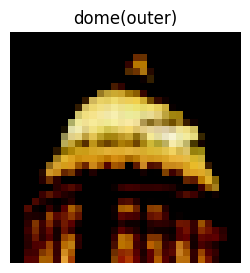

In [10]:
import matplotlib.pyplot as plt

torch.manual_seed(2)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.figure(figsize=(3, 3))
plt.imshow(img.permute(1, 2, 0))
plt.title(classes[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [11]:
from torch import nn

class SimpleCNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.name = "Shallow Model"
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x

In [12]:
class CustomCNN(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=256*2*2, out_features=512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=512, out_features=1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=1024, out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.conv_block_4(x)
        x = self.classifier(x)
        return x

In [13]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple
import torch


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    model.train()

    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    model.eval()

    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
               }
    model.to(device)

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(
            f"Epoch: {epoch + 1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
simple_cnn = SimpleCNN(
    input_shape=3,
    hidden_units=10,
    output_shape=len(classes)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=simple_cnn.parameters(), lr=0.001)

In [16]:
results_simple_cnn = train(
    simple_cnn,
    train_loader,
    val_loader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6630 | train_acc: 0.3947 | test_loss: 1.4094 | test_acc: 0.4963
Epoch: 2 | train_loss: 1.3649 | train_acc: 0.5100 | test_loss: 1.3147 | test_acc: 0.5205
Epoch: 3 | train_loss: 1.2039 | train_acc: 0.5831 | test_loss: 1.2045 | test_acc: 0.5662
Epoch: 4 | train_loss: 1.0877 | train_acc: 0.6237 | test_loss: 1.1528 | test_acc: 0.5928
Epoch: 5 | train_loss: 1.0034 | train_acc: 0.6551 | test_loss: 1.0968 | test_acc: 0.6121
Epoch: 6 | train_loss: 0.9426 | train_acc: 0.6724 | test_loss: 1.0628 | test_acc: 0.6363
Epoch: 7 | train_loss: 0.9021 | train_acc: 0.6887 | test_loss: 1.1807 | test_acc: 0.5801
Epoch: 8 | train_loss: 0.8604 | train_acc: 0.7104 | test_loss: 1.0946 | test_acc: 0.6228
Epoch: 9 | train_loss: 0.8305 | train_acc: 0.7174 | test_loss: 1.0488 | test_acc: 0.6334
Epoch: 10 | train_loss: 0.7917 | train_acc: 0.7280 | test_loss: 1.0694 | test_acc: 0.6351


In [17]:
import torch
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List, Tuple

def plot_loss_curves(results, title):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(12, 4))
    plt.suptitle(title, fontsize=15)

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

def calculate_performance(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        device: torch.device,
        class_names: List[str],
        title: str) -> Tuple[float, float, float]:
    model.eval()

    y_pred = []
    y_true = []
    test_acc = 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            output = (torch.max(torch.exp(test_pred_logits), 1)[1]).data.cpu().numpy()
            y_pred.extend(output)

            labels = y.data.cpu().numpy()
            y_true.extend(labels)

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_acc = test_acc / len(dataloader)
    cf_matrix = confusion_matrix(y_true, y_pred, normalize='true')
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    df_cm = pd.DataFrame(cf_matrix, index=[i for i in class_names],
                         columns=[i for i in class_names])
    plt.figure(figsize=(12, 7))
    plt.title(title)
    sns.heatmap(df_cm, annot=True)
    plt.show()

    return test_acc, f1, precision, recall

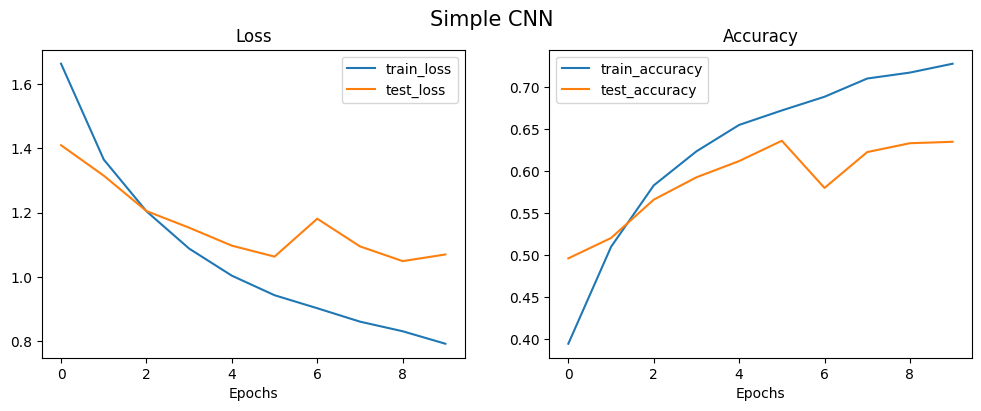

In [18]:
plot_loss_curves(results_simple_cnn, title="Simple CNN")

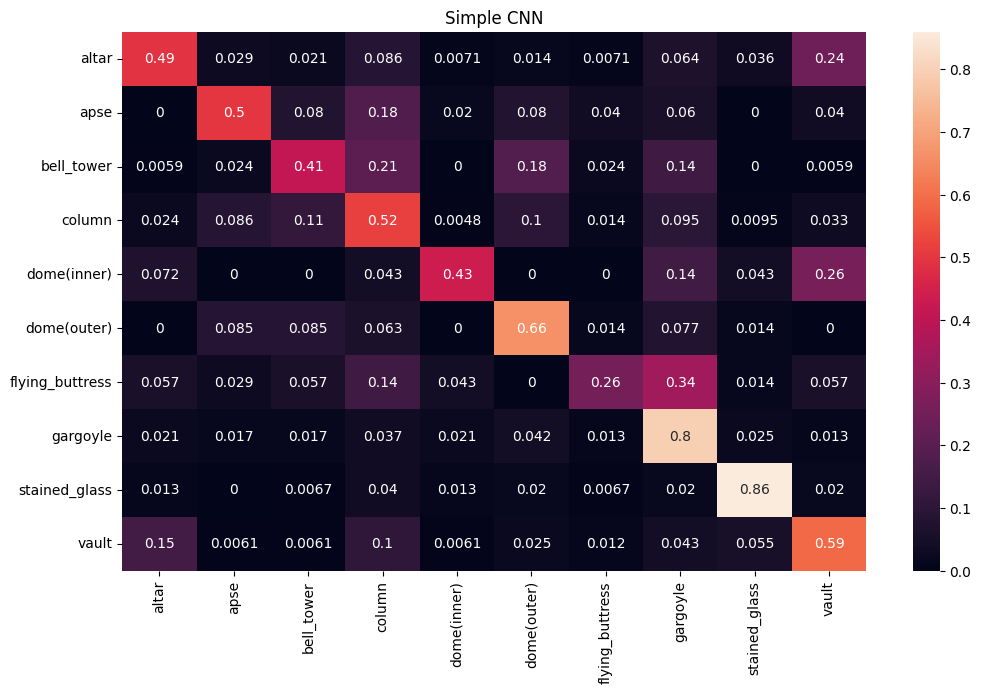

Accuracy = 0.5917140151515151, f1 score = 0.5542049425447819, precision = 0.5782359182463307, recall = 0.5522357153159597


In [19]:
acc, f1, precision, recall = calculate_performance(simple_cnn, 
                                                  test_loader, 
                                                  device, 
                                                  classes, 
                                                  "Simple CNN")
print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")

In [20]:
torch.manual_seed(42)
custom_cnn = CustomCNN(
    input_shape=3,
    output_shape=len(classes)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=custom_cnn.parameters(), lr=0.001)

In [21]:
results_custom_cnn = train(
    custom_cnn,
    train_loader,
    val_loader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.7854 | train_acc: 0.3943 | test_loss: 1.3893 | test_acc: 0.5630
Epoch: 2 | train_loss: 1.2608 | train_acc: 0.5770 | test_loss: 1.0691 | test_acc: 0.6324
Epoch: 3 | train_loss: 1.0565 | train_acc: 0.6445 | test_loss: 0.8966 | test_acc: 0.7071
Epoch: 4 | train_loss: 0.9332 | train_acc: 0.6817 | test_loss: 0.9339 | test_acc: 0.6988
Epoch: 5 | train_loss: 0.8064 | train_acc: 0.7293 | test_loss: 0.7952 | test_acc: 0.7418
Epoch: 6 | train_loss: 0.7069 | train_acc: 0.7636 | test_loss: 0.7158 | test_acc: 0.7653
Epoch: 7 | train_loss: 0.6278 | train_acc: 0.7873 | test_loss: 0.6118 | test_acc: 0.7970
Epoch: 8 | train_loss: 0.5568 | train_acc: 0.8164 | test_loss: 0.6948 | test_acc: 0.7833
Epoch: 9 | train_loss: 0.5150 | train_acc: 0.8264 | test_loss: 0.5667 | test_acc: 0.8080
Epoch: 10 | train_loss: 0.4707 | train_acc: 0.8441 | test_loss: 0.6396 | test_acc: 0.7979


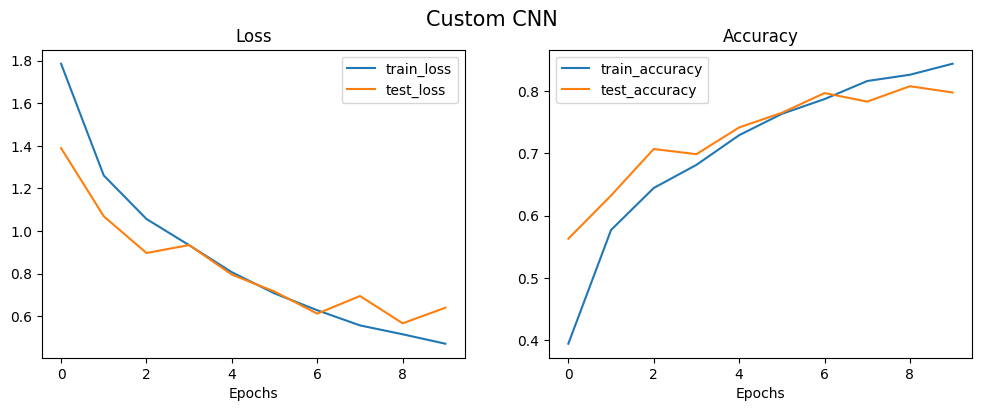

In [22]:
plot_loss_curves(results_custom_cnn, title="Custom CNN")

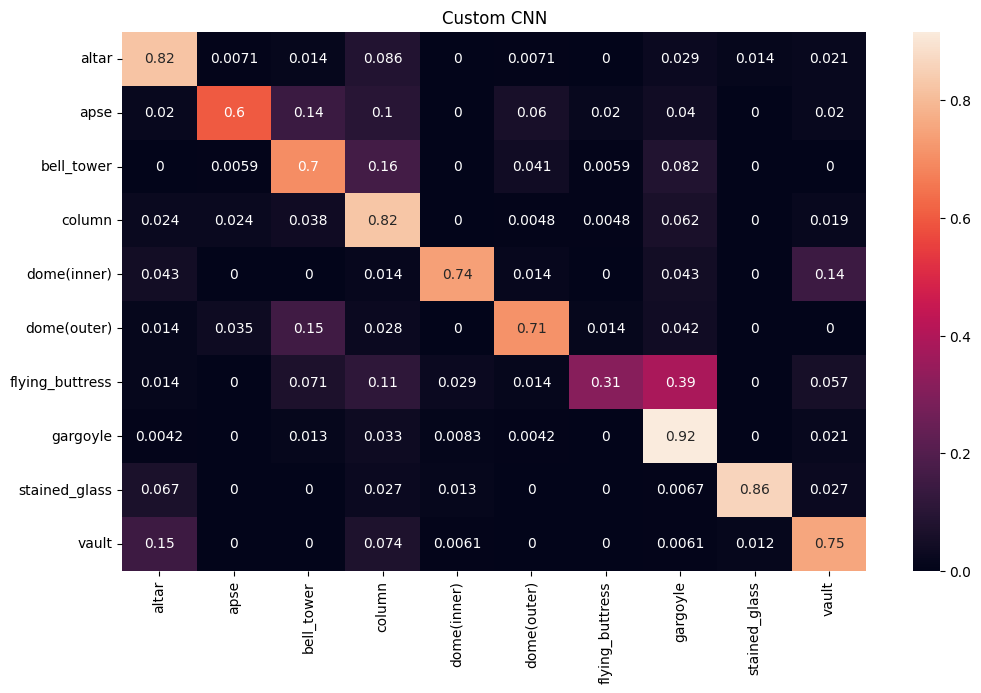

Accuracy = 0.7712121212121211, f1 score = 0.7422197511394815, precision = 0.7908915771174785, recall = 0.7241189743600752


In [23]:
acc, f1, precision, recall = calculate_performance(custom_cnn, 
                                                  test_loader, 
                                                  device, 
                                                  classes, 
                                                  "Custom CNN")
print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")

In [24]:
import torchvision

weights = torchvision.models.ResNet50_Weights.DEFAULT
model_resnet = torchvision.models.resnet50(weights=weights).to(device)
for param in model_resnet.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\asus/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


URLError: <urlopen error [Errno 11001] getaddrinfo failed>